<a href="https://colab.research.google.com/github/yerzhanatburkitbay1225/first_p_in_github/blob/main/Final%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
d004 = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'
df = pd.read_csv(d004).fillna(0)

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import csv                         #library
WWW = ['World','Asia','Europe']

s = df['location'][0]
original_date = ''
count = 0
o_date = []
for i in df['location']:
  if s==i:
    o_date.append(df['date'][count])
    if len(o_date)>len(original_date):
      original_date = o_date
  else:
    o_date = []
    s = i
  count += 1
c = 0
for i in original_date:
  if i == '2020-02-22':
    break
  c+=1
original_date = original_date[c:]

#<<<<<<<<
name_of_country = df['location'][0]
countries = [name_of_country]
count=0
for i in df['location']:
  if name_of_country==i:
    pass
  else:
    name_of_country=i
    countries.append(name_of_country)
  count+=1
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>.. afasflsadjfals;>>>>>>>>>>>>>>>>>>>>>>>>>>>....

In [3]:
def find_nomer(a):
  c = 0
  for i in df['location']:
    if i == a:
      break
    c+=1
  return c
#<<<<
def determinate(b):# memlekettin oz datasyn shygarady jane original data boiynsha malimetterdi ornalastyru
  da,dt,db = [],[],[]
  g = 0
  for i in df['location']:
    if i == b:
      dt.append(df['date'][g])
      da.append(abs(df['new_cases'][g]))
      db.append(abs(df['new_deaths'][g]))
    g+=1
  c = 0
  dd = {}
  dith = {}
  for i in dt:
    if i==original_date[0]:
      dt = dt[c:]
      da = da[c:]
      db = db[c:]
      break
    c+=1
  for i in range(len(dt)):
    dd[dt[i]]=da[i]
    dith[dt[i]] = db[i]
  return [dd,dith] # ar kundegi malimetter
#<<<<
def time(a):               # Kiris memlekettin aty boiynsha malimetterdi tolyqtyru \by 17:27 22.04.2021
  #c = find_nomer(a)
  g = {}
  g2 = {}
  count = 0
  dd = determinate(a)[0]
  dith = determinate(a)[1]
  x = [w for w in dd]
  x2 = [w for w in dith]
  for i in original_date:
    try:
      if i == x[count]:
        g[i] = dd[x[count]]
        count+=1
      else:
        g[i] = 0
    except IndexError:
      g[i] = 0
  count = 0
  for i in original_date:
    try:
      if i == x2[count]:
        g2[i] = dith[x2[count]]
        count+=1
      else:
        g2[i] = 0
    except IndexError:
      g2[i] = 0
  return g,g2
  #<<<<<<<<<<<<
country_2 = countries[0]
h = 0
whole_dd = {}
whole_dt = {}
for i in countries:
  if i in WWW:
    pass
  else:
    whole_dd[i] = time(i)[0]
    whole_dt[i] = time(i)[1]
#<<<<<<<<<<
ggg = {}
ggg1 = {}
for data in original_date:
  t = 0
  c = 0
  for i in whole_dd:
    t+=whole_dd[i][data]
    c+=whole_dt[i][data]
  ggg[data]=t
  ggg1[data] = c
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
with open('file_only_data_and_cases.csv', 'w') as csvfile:
  writer = csv.DictWriter(csvfile, fieldnames=original_date)
  writer.writeheader() # for taqyryp
  for i in whole_dd:
    writer.writerow(whole_dd[i])
file_only_d = 'file_only_data_and_cases.csv'

try:
    with open('file_only_data_and_diths.csv', 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=original_date)
        writer.writeheader() # for taqyryp
        for i in whole_dt:
          writer.writerow(whole_dt[i])
except AttributeError:
    print("I/O error")
file_only_dt = 'file_only_data_and_diths.csv'
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
g = pd.read_csv(file_only_d)
gt = pd.read_csv(file_only_dt)
h = 0
x = 0
#dv = {}
s,f,dr = [],[],[]
for i in original_date: # data
  h+=g[i]
  x+=gt[i]
  #dv[i] = sum(g[i])  dictionaryga ainaldyru ushin  
  s.append(i)
  f.append(sum(g[i]))
  dr.append(sum(gt[i]))
  #print(g[i])# bir eldin bukil auyrgandarynyn sany The total number of patients in one country
h # = ar memlekette bukil auyrgandar sany .Series
x # bukil memelekettegi qaitys bolgandar sany   Number of deaths in the whole country
for_plot_whole_worldwide_cases = pd.DataFrame(f,s)# bukil alem boiynsha kundelikti auyrgandar sany         Number of daily patients in the country
for_plot_whole_worldwide_dcases = pd.DataFrame(dr,s)#bukil alem boiynsha kundelikti qaitys bolgandar sany  Daily die cases in the whole country

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
each_c_amount = []
each_c = []
c = 0
havnot = []
for i in range(len(h)):  #This is to identify countries where there are sick people
  if h[i] == 0:  # bizge auyrmagan memleket kerek emes 
    havnot.append(countries[i])
  else:
    each_c.append(countries[i])
    each_c_amount.append(h[i])

for_plot_each_worldwide_cases = pd.DataFrame(each_c,each_c_amount)

In [4]:
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
def for_ggg(a):
  gg1 = {}
  if str(a)[0].isalpha():
    a = int(a[1:])
    r = len(ggg)-a#>>>>>>>>>>>>>>>>>>-2
    c = 0
    for i in ggg:
      if c>=r:
        gg1[i] = ggg[i]
      c+=1
  else:
    a = int(a)
    c = 0
    for i in ggg:
      if c % a==0:
        gg1[i] = ggg[i]
      c+=1
  return gg1
#for_ggg('30')

def for_ggg1(a):
  g1 = {}
  if str(a)[0].isalpha():
    a = int(a[1:])
    r = len(ggg1)-a
    c = 0
    for i in ggg1:
      if c>=r:
        g1[i] = ggg1[i]
      c+=1
  else:
    a = int(a)
    c = 0
    for i in ggg1:
      if c%a==0:
        g1[i] = ggg1[i]
      c+=1
  return g1

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
def jiylyk(a):          #baza for fix date   #top fixer >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> for Frequency
  dict_for_plot = {}
  for i in whole_dd:
    t = 0
    for_dict = {}
    s = whole_dd[i]                      #s = ar memlekettin derekteri
    for w in s:
      if (str(a)[0]).isalpha():
        r = len(whole_dd[i])-int(a[1:])
        if t>=r:
          for_dict[w]=s[w]
        t+=1
      else:
        a = int(a)
        if t%a==0:            #i = memleket attry
            for_dict[w]=s[w]  #w = '202y-as-sd'
        t+=1
      dict_for_plot[i]=for_dict
  dict_for_plot1 = {}
  for i in whole_dt:
    t = 0
    for_dict = {}
    s = whole_dt[i]                     #s = ar memlekettin derekteri
    for w in s:
      if (str(a)[0]).isalpha():
        r = len(whole_dt[i])-int(a[1:]) #t ushin>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>-2
        if t>=r:
          for_dict[w]=s[w]
        t+=1
      else:
        a = int(a)
        if t%a==0:            #i = memleket attry
            for_dict[w]=s[w]  #w = '202y-as-sd'
        t+=1
      dict_for_plot1[i]=for_dict
  return dict_for_plot,dict_for_plot1

In [5]:
#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<controller all information
def manager(nae, plot_by_data, kind_cases,yes):
  y = 0
  while y == 0:
    if nae in havnot:
      nae = input('Bizde bul memleket turaly aqparat joq, basqa eldi engiz: ')
      y=0
    else:
      if nae == 'Whole World':
        y = 1
        for_plotting_pd = for_ggg(plot_by_data)
        for_plotting_pd1 = for_ggg1(plot_by_data)
        break
      try:
        for_plotting_pd = jiylyk(plot_by_data)[0][nae]
        for_plotting_pd1 = jiylyk(plot_by_data)[1][nae]     
        y = 1
      except KeyError:
        nae = input('name is not right, place enter again: ')
  print('Place, whait for 15 secund!')
  if kind_cases=='die_cases':
    fff = for_plotting_pd1
  elif kind_cases=='cases':
    fff = for_plotting_pd
  else:
    fff = [for_plotting_pd,for_plotting_pd1]
  ddd = f'plot_about_covit-19_in_{nae} ({kind_cases}).png'
  return plotting(nae,fff,plot_by_data,yes,ddd)

In [6]:
def plotting(nae, for_plotting_pd,plot_by_data,yes, ddd): #pressing
  j = 0
  for_plotting_pd1 = 0
  if len(for_plotting_pd)==2:
    f = for_plotting_pd
    for_plotting_pd = f[0]
    for_plotting_pd1 = f[1]
    j = 1
  d = 0
  if str(plot_by_data)[0].isalpha():
    a = int(plot_by_data[1:])
    d = 1
    name = f'Graph about Covet-19 in the {nae} (Last {a} day)'
  else:
    a = int(plot_by_data)
    name = f'Graph about Covet-19 in the {nae} ({a} daily)'
  if 26<=a<=50:
    plotting30(name,for_plotting_pd,for_plotting_pd1,j)
  #>>>>>
  elif (d==0 and 7<=a<=25) or (d==1 and a<=15):
    plotting7(name, for_plotting_pd, for_plotting_pd1,d,j)
  #>>>>>
  else:
    if a==1:
        name = f'Graph about Covet-19 in the {nae} (all time)'
    plottingwhole(name,for_plotting_pd,for_plotting_pd1,j)
  if yes == 'y' or yes == 'yes':
    plt.savefig(ddd)

def neww(for_plotting_pd): # for creat pandas for dictionary
  d = []
  g = []
  s = {}
  for i in for_plotting_pd:
      d.append(i)
      g.append(for_plotting_pd[i])
  s['date'] = d
  s['cases'] = g
  new = pd.DataFrame.from_dict(s)
  return new
#>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
def plotting7(name, f, f1,d,j):
  if j==0:
    frequencies = [f[i] for i in f]
    freq_series = pd.Series(frequencies)

    x_labels = [i for i in f]
    b = 45
    if d==1:
      b = 0
    fig, ax = plt.subplots(1, figsize=(18,6),sharex = True)
    ax = freq_series.plot(kind='bar',color = '#ffcf9e')
    ax.set_xticklabels(x_labels, rotation = b)
    ax.set_title(name, color = 'r', fontsize = 14)
    rects = ax.patches
    if d==1:
      labels = [int(f[i]) for i in f]
      for rect, label in zip(rects, labels):
          height = rect.get_height()
          ax.text(rect.get_x() + rect.get_width() / 2, height+0.15, label,ha='center', va='bottom', rotation = 0)
  else:
    labels = [i for i in f]
    malimet1 = [f[i] for i in f]
    malimet2 = [f1[i] for i in f1]
    x = labels
    fig, ax = plt.subplots(1, figsize=(18,6),sharex = True)
    rects1 = ax.bar(x, malimet1, width=0.8, label='Sick people')
    rects2 = ax.bar(x, malimet2, width=0.8, label='The dead')

    ax.set_title(name, color = 'r', fontsize = 14)
    ax.set_xticks(x)
    s = 75
    if d==1:
      s = 0
    ax.set_xticklabels(labels,rotation = s)
    ax.legend()
    rects = ax.patches
    labels = [int(f[i]) for i in f]+[int(f1[i]) for i in f1]
    if d == 1:
      for rect, label in zip(rects, labels):
          height = rect.get_height()
          ax.text(rect.get_x() + rect.get_width() / 2, height+0.15, label,ha='center', va='bottom', rotation = 0)
 
def plotting30(name,f,f1,r): # r = l or not
  x = [i for i in f]
  y = [f[i] for i in x]
  fig, ax = plt.subplots(1, figsize=(18,6),sharex = True)
  ax.set_xticklabels(neww(f)['date'],rotation=35,ha='right') #xticklabels for x tagy mander aty
  plt.title(name,color = 'r')
  if r==1:
    d = [i for i in f1]
    z = [f1[i] for i in d]
    plt.stem(x,y,'r',label='Sick people')
    plt.stem(d,z,linefmt='y',markerfmt='D',label='The dead')
    plt.legend()
  else:
    print('else')
    plt.stem(x,y,'r')
  if r == 0:
    ax.set_xticklabels(neww(f)['date'].unique().astype(str), rotation='vertical')
  sns.despine(bottom=True)
  plt.tight_layout(h_pad=1)                  # ornalasu tygyzdygy

  
def plottingwhole(name,f,f1,r):
  plt.figure(figsize=(18,6))
  plt.grid(True, color = 'b',alpha = 0.2)
  plt.title(name,color = 'r')
  plt.xlabel('time')
  if r==0:
    sns.lineplot(data=f, color = '#4f3f63' , linewidth=2.5);
  else:
    x = [i for i in f]
    y = [f[i] for i in x]
    z = [i for i in f1]
    k = [f1[i] for i in z]
    plt.plot(x,y,z,k)

name_of_country/world: Kazahkstan
mounthly/last_week/last_month/all time: l15
what kind of you want (cases,die_cases,Both): Both
Do you want to save diogram, y/n: n
name is not right, place enter again: Kazakhstan
Place, whait for 15 secund!


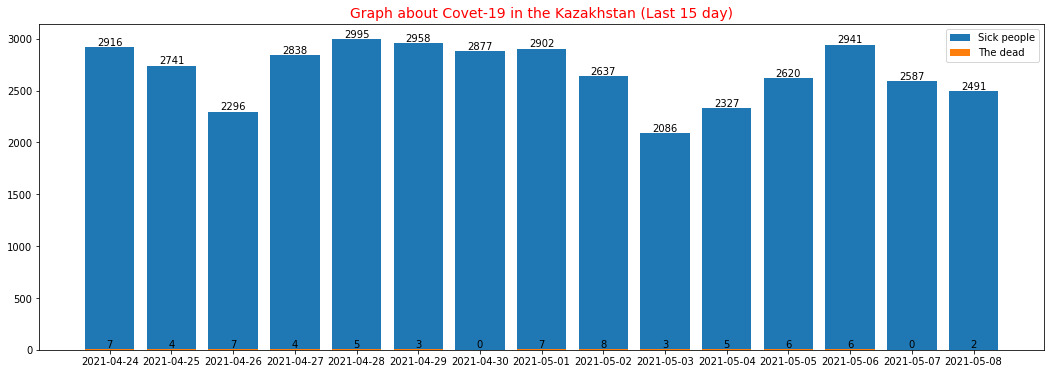

In [7]:
where = input('name_of_country/world: ')
when = input('mounthly/last_week/last_month/all time: ')
kind = input('what kind of you want (cases,die_cases,Both): ')
save = input('Do you want to save diogram, y/n: ')
manager(where, when,kind,save)